In [55]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor

Let's prepare our Data 

In [56]:
test_df = pd.read_csv("test.csv")
train_df = pd.read_csv("train.csv")

# print(test_df.head(10))
# print(train_df.head(10))

if 'SalePrice' not in test_df.columns:
    test_df['SalePrice'] = 0 

housing_df = pd.concat([test_df,train_df], axis = 0)
housing_df = housing_df.set_index('Id')
housing_df.reset_index(drop=True,inplace=True)
print(housing_df.head(10))



   MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0          20       RH         80.0    11622   Pave   NaN      Reg   
1          20       RL         81.0    14267   Pave   NaN      IR1   
2          60       RL         74.0    13830   Pave   NaN      IR1   
3          60       RL         78.0     9978   Pave   NaN      IR1   
4         120       RL         43.0     5005   Pave   NaN      IR1   
5          60       RL         75.0    10000   Pave   NaN      IR1   
6          20       RL          NaN     7980   Pave   NaN      IR1   
7          60       RL         63.0     8402   Pave   NaN      IR1   
8          20       RL         85.0    10176   Pave   NaN      Reg   
9          20       RL         70.0     8400   Pave   NaN      Reg   

  LandContour Utilities LotConfig  ... PoolArea PoolQC  Fence MiscFeature  \
0         Lvl    AllPub    Inside  ...        0    NaN  MnPrv         NaN   
1         Lvl    AllPub    Corner  ...        0    NaN    NaN        Gar2  

In [57]:
df_null  = housing_df[housing_df.isnull().sum()[housing_df.isnull().sum()>0].index]
df_null.head()

,MSZoning,LotFrontage,Alley,Utilities,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,BsmtQual,BsmtCond,...,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PoolQC,Fence,MiscFeature,SaleType
0,RH,80.0,NaN,AllPub,VinylSd,VinylSd,NaN,0.0,TA,TA,...,1961.0,Unf,1.0,730.0,TA,TA,NaN,MnPrv,NaN,WD
1,RL,81.0,NaN,AllPub,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,...,1958.0,Unf,1.0,312.0,TA,TA,NaN,NaN,Gar2,WD
2,RL,74.0,NaN,AllPub,VinylSd,VinylSd,NaN,0.0,Gd,TA,...,1997.0,Fin,2.0,482.0,TA,TA,NaN,MnPrv,NaN,WD
3,RL,78.0,NaN,AllPub,VinylSd,VinylSd,BrkFace,20.0,TA,TA,...,1998.0,Fin,2.0,470.0,TA,TA,NaN,NaN,NaN,WD
4,RL,43.0,NaN,AllPub,HdBoard,HdBoard,NaN,0.0,Gd,TA,...,1992.0,RFn,2.0,506.0,TA,TA,NaN,NaN,NaN,WD


<Axes: >

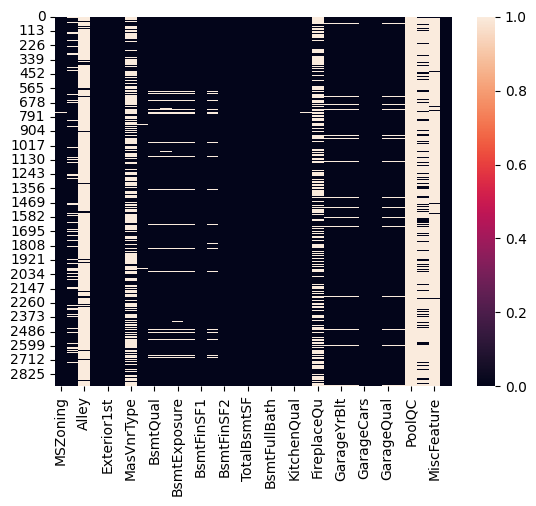

In [58]:
sns.heatmap(df_null.isnull())


In [59]:
df_objects =  housing_df[housing_df.select_dtypes(include=['object']).columns]
housing_df = housing_df.drop(housing_df[df_objects.isna().sum()[df_objects.isna().sum() > 1100].index], axis = 1)

In [60]:
df_objects = df_objects.drop(df_objects[df_objects.isna().sum()[df_objects.isna().sum() > 1100].index], axis = 1)

df_objects = df_objects.fillna('null')

df_objects_encoded = pd.get_dummies(df_objects)



In [61]:
df_objects['Utilities'].value_counts()

Utilities
AllPub    2916
null         2
NoSeWa       1
Name: count, dtype: int64

In [62]:
for i in df_objects_encoded.columns:
    if 'null' in i:
        df_objects_encoded = df_objects_encoded.drop(i,axis=1)
        print(i)
        


MSZoning_null
Utilities_null
Exterior1st_null
Exterior2nd_null
BsmtQual_null
BsmtCond_null
BsmtExposure_null
BsmtFinType1_null
BsmtFinType2_null
Electrical_null
KitchenQual_null
Functional_null
GarageType_null
GarageFinish_null
GarageQual_null
GarageCond_null
SaleType_null


In [63]:
new_housing_df = pd.concat([housing_df, df_objects_encoded], axis = 1)
print(new_housing_df.head(10))

   MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0          20       RH         80.0    11622   Pave      Reg         Lvl   
1          20       RL         81.0    14267   Pave      IR1         Lvl   
2          60       RL         74.0    13830   Pave      IR1         Lvl   
3          60       RL         78.0     9978   Pave      IR1         Lvl   
4         120       RL         43.0     5005   Pave      IR1         HLS   
5          60       RL         75.0    10000   Pave      IR1         Lvl   
6          20       RL          NaN     7980   Pave      IR1         Lvl   
7          60       RL         63.0     8402   Pave      IR1         Lvl   
8          20       RL         85.0    10176   Pave      Reg         Lvl   
9          20       RL         70.0     8400   Pave      Reg         Lvl   

  Utilities LotConfig LandSlope  ... SaleType_ConLw SaleType_New SaleType_Oth  \
0    AllPub    Inside       Gtl  ...          False        False        False   
1

In [78]:
new_df = new_housing_df.drop(new_housing_df.select_dtypes(include=['object']), axis = 1)

new_df.isna().sum()[new_df.isna().sum() > 0]

LotFrontage     486
MasVnrArea       23
BsmtFinSF1        1
BsmtFinSF2        1
BsmtUnfSF         1
TotalBsmtSF       1
BsmtFullBath      2
BsmtHalfBath      2
GarageYrBlt     159
GarageCars        1
GarageArea        1
dtype: int64

In [79]:
Mode_columns = ['GarageCars', 'GarageYrBlt', 'BsmtFullBath', 'BsmtHalfBath']
Mean_columns = ['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
                'TotalBsmtSF', 'GarageArea']

for i in Mode_columns:
    new_df[i] = new_df[i].fillna(new_df[i].mode()[0])

for i in Mean_columns:
    new_df[i] = new_df[i].fillna(np.round(new_df[i].mean()))

new_df.isna().sum()[new_df.isna().sum() > 0] 

Series([], dtype: int64)

In [80]:
training_data = new_df[0:len(train_df)]
testing_data = new_df[len(test_df):]
testing_data = testing_data.drop(columns='SalePrice')

Now Let's train our data.

We are going to test out three models:
 * LinearRegression()
 * XGBRegressor()
 * RandomForestRegressor() 

In [81]:
X = training_data.drop(columns='SalePrice')
y = training_data['SalePrice']
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=0.2)

Y_test = np.reshape(Y_test,(-1,1))
Y_train = np.reshape(Y_train,(-1,1))

X_train.shape, Y_train.shape



((1168, 266), (1168, 1))

In [82]:
model_1 = LinearRegression()
model_1.fit(X, y)
y_pred = model_1.predict(X_test)
root_mean_squared_error(Y_test, y_pred)

np.float64(782.1717405435007)

In [83]:
model_2 = XGBRegressor(n_estimators=1000, learning_rate=0.1, random_state=42)
model_2.fit(X, y)
y_pred = model_2.predict(X_test)
root_mean_squared_error(Y_test, y_pred)

np.float64(2.149696029291762e-20)

In [84]:
model_3 = RandomForestRegressor(n_estimators=1000)
model_3.fit(X, y)
y_pred = model_3.predict(X_test)
root_mean_squared_error(Y_test, y_pred)

np.float64(1742.5148519934653)

Based on the root_mean_squared_error of 2.796512201403204e-20 we can see that XGBRegressor is the most suitable and so we wil go with it

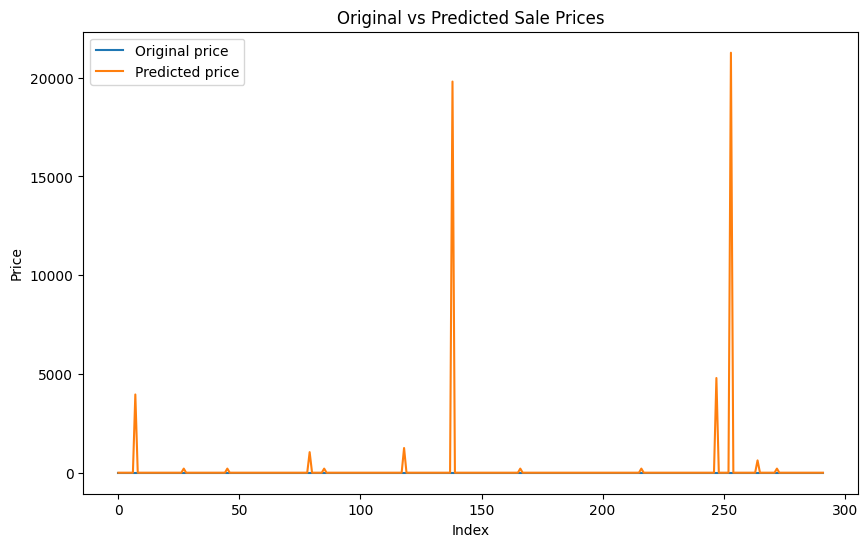

In [85]:
sort_indices = np.argsort(Y_test)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(np.arange(len(Y_test)), Y_test, label='Original price')
plt.plot(np.arange(len(Y_test)), y_pred, label='Predicted price')
plt.xlabel('Index')
plt.ylabel('Price')
plt.title('Original vs Predicted Sale Prices')
plt.legend()
plt.show()

In [86]:
pred = model_2.predict(testing_data)

final = pd.DataFrame()
final['Id'] = testing_data.index
final['SalePrice'] = pred

# Write DataFrame to a CSV file without index
final.to_csv('output.csv', index=False)